In [24]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('weatherAUS(Prepared).csv')
df=df.drop(labels=['Date','RainTomorrow','Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0
1,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0
2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0
3,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0
4,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,3.5,21.8,0.0,5.472516,7.63054,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0
140783,2.8,23.4,0.0,5.472516,7.63054,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0
140784,3.6,25.3,0.0,5.472516,7.63054,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0
140785,5.4,26.9,0.0,5.472516,7.63054,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0


In [25]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

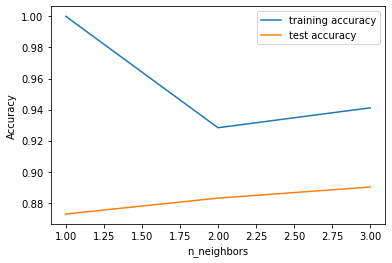

In [27]:
#KNN test-train split
#n_neighbors=3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, df.RainToday, random_state=10)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 4)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [28]:

print("Train set accuracy: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Train set accuracy: 0.94
Test set accuracy: 0.89


In [29]:
#KNN cross-validation
#n_neighbors=3
from sklearn.model_selection import cross_validate
res = cross_validate(knn, df, df.RainToday, cv=3,
                     return_train_score=True)
display(res)

{'fit_time': array([0.10258675, 0.03999352, 0.02807403]),
 'score_time': array([85.21333027, 84.56472397, 84.13391948]),
 'test_score': array([0.88716998, 0.86780029, 0.89047284]),
 'train_score': array([0.94119841, 0.94373415, 0.93777835])}

In [30]:
#KNN cross-validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, df, df.RainToday, cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88716998 0.86780029 0.89047284]
Average cross-validation score: 0.88


In [31]:
#KNN confusion matrix
from sklearn.metrics import confusion_matrix
knn_pred=knn.predict(X_test)
confusion = confusion_matrix(y_test, knn_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[26238   992]
 [ 2872  5095]]


In [32]:
#KNN classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred,
                            target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.90      0.96      0.93     27230
         Yes       0.84      0.64      0.73      7967

    accuracy                           0.89     35197
   macro avg       0.87      0.80      0.83     35197
weighted avg       0.89      0.89      0.88     35197



In [33]:
#Area under curve for KNN
from sklearn.metrics import roc_auc_score
knn_auc=roc_auc_score(y_test,knn_pred)
print("AUC for KNN {:.3f}".format(knn_auc))

AUC for KNN 0.802


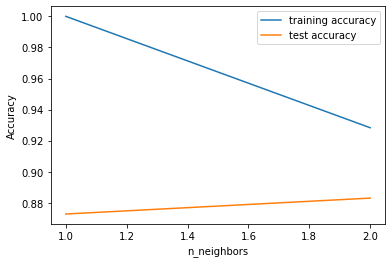

In [34]:
#Train_test_split 
# n_neighbors=2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, df.RainToday, random_state=10)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 3)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [35]:
print("Train set accuracy: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Train set accuracy: 0.93
Test set accuracy: 0.88


In [36]:
#KNN cross-validation
from sklearn.model_selection import cross_validate
res = cross_validate(knn, df, df.RainToday, cv=3,
                     return_train_score=True)
display(res)

{'fit_time': array([0.07981563, 0.02732396, 0.03200889]),
 'score_time': array([84.22024679, 84.3529036 , 90.03744936]),
 'test_score': array([0.88246074, 0.87240299, 0.88052164]),
 'train_score': array([0.92838117, 0.93061859, 0.92492915])}

In [37]:
#KNN cross-validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, df, df.RainToday, cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88246074 0.87240299 0.88052164]
Average cross-validation score: 0.88


In [38]:
#KNN confusion matrix
from sklearn.metrics import confusion_matrix
knn_pred=knn.predict(X_test)
confusion = confusion_matrix(y_test, knn_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[26814   416]
 [ 3699  4268]]


In [39]:
#KNN classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred,
                            target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.88      0.98      0.93     27230
         Yes       0.91      0.54      0.67      7967

    accuracy                           0.88     35197
   macro avg       0.89      0.76      0.80     35197
weighted avg       0.89      0.88      0.87     35197



In [40]:
#Area under curve for KNN
from sklearn.metrics import roc_auc_score
knn_auc=roc_auc_score(y_test,knn_pred)
print("AUC for KNN {:.3f}".format(knn_auc))

AUC for KNN 0.760
